## Лабораторная работа 3.4.2 (4.15) ##

### Тема: Закон Кюри-Вейса ###

**Цель работы:** изучение температурной зависимости магнитной восприимчивости ферромагнетика выше точки Кюри.

**В работе используются:** катушка самоиндукции с образцом из гадолиния, термостат, частотометр, цифровой вольтметр, $LC$-автогенератор, термопара медь-константан. 

**Используемые соотношения:**

**1)** $1/\chi \approx(T - \theta_p) \approx 1/(\tau^{2} - \tau_0^{2})$ 

**Описание работы:** https://mipt.ru/education/chair/physics/S_III/lab_el/new%203.4.2(4.15)_%D0%97%D0%B0%D0%BA%D0%BE%D0%BD%20%D0%9A%D1%8E%D1%80%D0%B8-%D0%92%D0%B5%D0%B9%D1%81%D1%81%D0%B0.pdf

**Ход работы:**

Исследуем зависимость преиода колебаний $\tau$ $LC$-генератора от температуры $T$ образца. Проведём измерения в диапазоне от $14^{\circ}C$ до $40^{\circ}C$.

Постоянная термопары: $K = 24^{\circ}C/мВ$

Период колебаний без образца: $\tau_0 = 8.252 \: мкс$

In [5]:
import pandas as pd
# ЭДС термопары = 2.08 * 10^-2
T_1_list = pd.Series([ 14.06, 16.03, 18.02, 20.02, 22.01, 24.01, 26.01, 28.00, 30.00, 32.01, 34.00, 36.00, 38.00, 40.00 ]) # дисплей
T_2_list = pd.Series([ 15.0, 17.0, 19.0, 21.0, 23.0, 25.0, 27.0, 29.0, 31.0, 33.0, 35.0, 37.0, 39.00, 41.00 ]) # термометр
tau_list = pd.Series([ 10.0961, 9.9850, 9.7900, 9.4863, 9.0713, 8.7589, 8.6300, 8.5524, 8.5077, 8.4751, 8.4500, 8.4303, 8.4163, 8.4044 ]) # мкс
U_list = pd.Series([ -0.005, -0.014, -0.016, -0.016, -0.016, 0.014, -0.017, -0.012, -0.017, -0.019, -0.019, -0.014, -0.0019, -0.019 ]) # мВ

K = 24 # град/мВ
tau_0 = 8.252 # мксек
sigma_tau_0 = 0.001 # мксек
sigma_T = 0.1
sigma_U = 0.001
T_real_list = T_2_list - U_list * K # К
sigma_T_real = ( sigma_T**2 + (sigma_U * K)**2 )**(1/2)

delta_tau_pow_2 = (tau_list * 10**-6)**2 - (tau_0 * 10**-6)**2 # сек^2
sigma_delta_tau_pow_2 = 2**0.5 * 10**-4

table_1 = pd.DataFrame({
    "T, К" : T_real_list,
    "(𝜏^2 - 𝜏0^2), с^-11" : delta_tau_pow_2 * 10**11
})
print(table_1.T)

                            0          1         2          3          4   \
T, К                 15.120000  17.336000  19.38400  21.384000  23.384000   
(𝜏^2 - 𝜏0^2), с^-11   3.383573   3.160472   2.77486   2.189438   1.419298   

                            5         6          7          8          9   \
T, К                 24.664000  27.40800  29.288000  31.408000  33.456000   
(𝜏^2 - 𝜏0^2), с^-11   0.862283   0.63814   0.504804   0.428546   0.373182   

                          10         11        12         13  
T, К                 35.4560  37.336000  39.04560  41.456000  
(𝜏^2 - 𝜏0^2), с^-11   0.3307   0.297445   0.27386   0.253844  


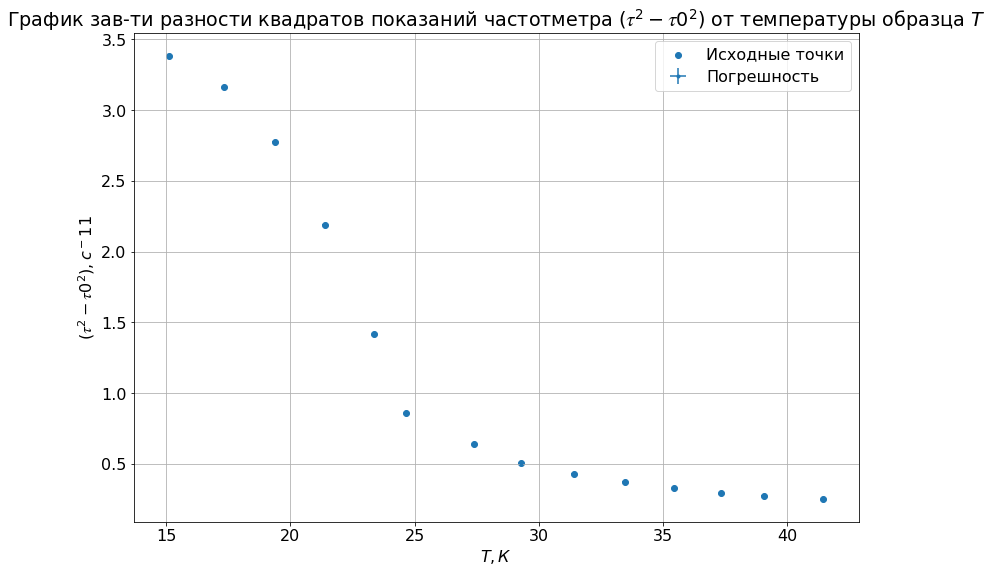

In [8]:
# Print plot of Δ𝜏^2 = f(T)
val_x = pd.Series(table_1["T, К"])
val_y = pd.Series(table_1["(𝜏^2 - 𝜏0^2), с^-11"])
sigma_val_x = sigma_T_real
sigma_val_y = sigma_delta_tau_pow_2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 16 

plt.figure(figsize=(13,9))

plt.title(r"График зав-ти разности квадратов показаний частотметра $(𝜏^2 - 𝜏0^2)$ от температуры образца $T$")
plt.ylabel("$(𝜏^2 - 𝜏0^2), с^-11$")
plt.xlabel(r"$T, К$")

plt.scatter(val_x, val_y, label='Исходные точки')

plt.errorbar(val_x, val_y, yerr=sigma_val_y, xerr=sigma_val_x, fmt='.', label='Погрешность') 

plt.grid(b=True, which='major', axis='both', alpha=1)
plt.grid(b=True, which='minor', axis='both', alpha=0.5)

plt.legend()

18.482087692002448
0.14085311810855752


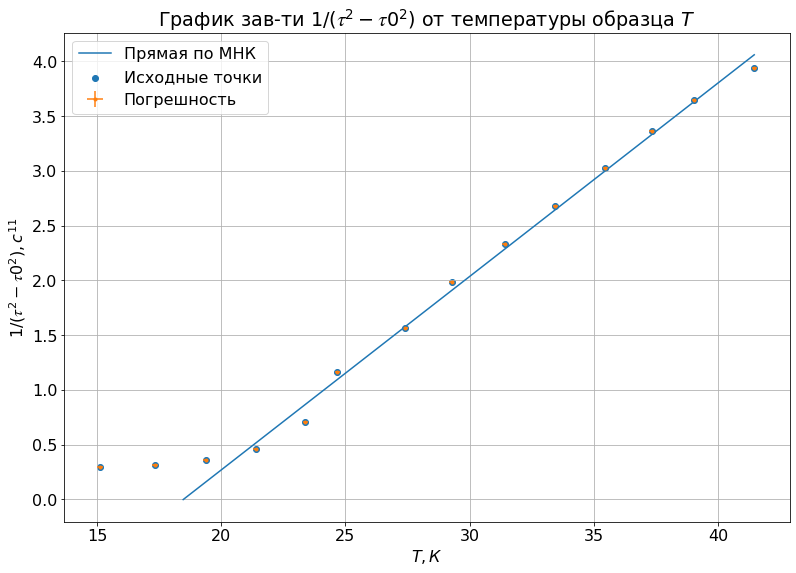

In [14]:
def mnk_method(val_x, val_y):
    '''
    Принимает Series точек по x и Series по y
    Возвращает list из b, a, sigma_b, sigma_a
    '''
    b = ( (val_x * val_y).mean() - val_x.mean() * val_y.mean() )/( (val_x**2).mean() - val_x.mean()**2 )
    a = val_y.mean() - b * val_x.mean()
    sigma_b = 1 / val_x.size * ( ( (val_y**2).mean() - val_y.mean()**2 ) / \
                           ( (val_x**2).mean() - val_x.mean()**2 ) - b**2 )**(1/2)
    sigma_a = sigma_b * ( (val_x**2).mean() - val_x.mean()**2 )**(1/2)
    
    return {'b' : b, 'a' : a, 'sigma_b' : sigma_b, 'sigma_a' : sigma_a}




res_val = mnk_method(table_1["T, К"][4:], 1 / table_1["(𝜏^2 - 𝜏0^2), с^-11"][4:])

val_x = table_1["T, К"]
val_y = 1 / table_1["(𝜏^2 - 𝜏0^2), с^-11"]

plt.figure(figsize=(13,9))

plt.title("График зав-ти $1 / (𝜏^2 - 𝜏0^2)$ от температуры образца $T$")
plt.ylabel("$1/(𝜏^2 - 𝜏0^2), с^{11}$")
plt.xlabel("$T, К$")

x = np.linspace(18.47, val_x.max(), 100)
y = res_val['b'] * x + res_val['a']
plt.plot(x, y, label="Прямая по МНК")

plt.scatter(val_x, val_y, label='Исходные точки')

plt.errorbar(val_x, val_y, yerr=sigma_val_y, xerr=sigma_val_x, fmt='.', label='Погрешность') 

plt.grid(b=True, which='major', axis='both', alpha=1)
plt.grid(b=True, which='minor', axis='both', alpha=0.5)

plt.legend()

theta_p = -res_val["a"] / res_val["b"] # T
sigma_theta_p = theta_p * ( (res_val["sigma_a"] / res_val["a"])**2 + (res_val["sigma_b"] / res_val["b"])**2 )**0.5
print(theta_p)
print(sigma_theta_p)

Ферромагнитная точка Кюри: $\theta \: \approx 16 \: ^{\circ} C$

Парамагнитная точка Кюри: $\theta_p = 18.5 \pm 0.2 \: ^{\circ} C$